In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import os


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D


In [2]:
NB_MULTI_TAB = 10
NB_FRAME = 15
NB_ZONE_VISAGE = 17
PATH = "Resultats/"

def recupResultats(path, videoName):

    fichier = open(path + videoName, "r")
    strRes = fichier.read()
    debutMultiTab = 0

    resultats = np.empty([NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])

    for i in range(NB_MULTI_TAB):
        debutMultiTab = strRes.find("[[", debutMultiTab + 1)
        debutTab = 0
        finTab = 0
        for j in range(NB_ZONE_VISAGE):
            if j == 0:
                debutTab = strRes.find("[", debutMultiTab + debutTab + 1)
                finTab = strRes.find("]", debutMultiTab + finTab + 2)
            else:
                debutTab = strRes.find("[", debutTab + 1)
                finTab = strRes.find("]", finTab + 2)

            resultats[i][j] = np.fromstring(strRes[debutTab + 1: finTab], dtype=float, sep=' ')

    fichier.close()
    return resultats

def recupMaxParZone(resultats,ok):

    maxParZone = np.empty([NB_ZONE_VISAGE, NB_MULTI_TAB])
    for i in range(NB_MULTI_TAB):
        for j in range(NB_ZONE_VISAGE):
            maxParZone[j][i] = np.max(resultats[i][j])
    return maxParZone

In [3]:
lstVideo = os.listdir(PATH)
lstVideo.sort()
lstResultats = np.empty([len(lstVideo),NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])
lstMaxParZone = np.empty([len(lstVideo), NB_ZONE_VISAGE, NB_MULTI_TAB])
y = [''] * len(lstVideo)
for i, video in enumerate(lstVideo):
    lstResultats[i] = recupResultats(PATH,video)
    lstMaxParZone[i] = recupMaxParZone(lstResultats[i], i)
    y[i] = video[0]

In [4]:
feat_cols = [""] * 170
for i in range(NB_ZONE_VISAGE):
    for j in range(NB_MULTI_TAB):
            feat_cols[i * NB_MULTI_TAB + j] = "Max_" + str(j + 1) + "_Zone_" + str(i + 1)
lstMaxParZone = lstMaxParZone.reshape(len(lstMaxParZone), NB_MULTI_TAB * NB_ZONE_VISAGE)
df = pd.DataFrame(lstMaxParZone,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
#lstMaxParZone, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (39, 172)


In [5]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(lstMaxParZone)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.000s...
[t-SNE] Computed neighbors for 39 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 25.057947
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.745045
[t-SNE] KL divergence after 1000 iterations: 0.442080
t-SNE done! Time elapsed: 0.16356325149536133 seconds


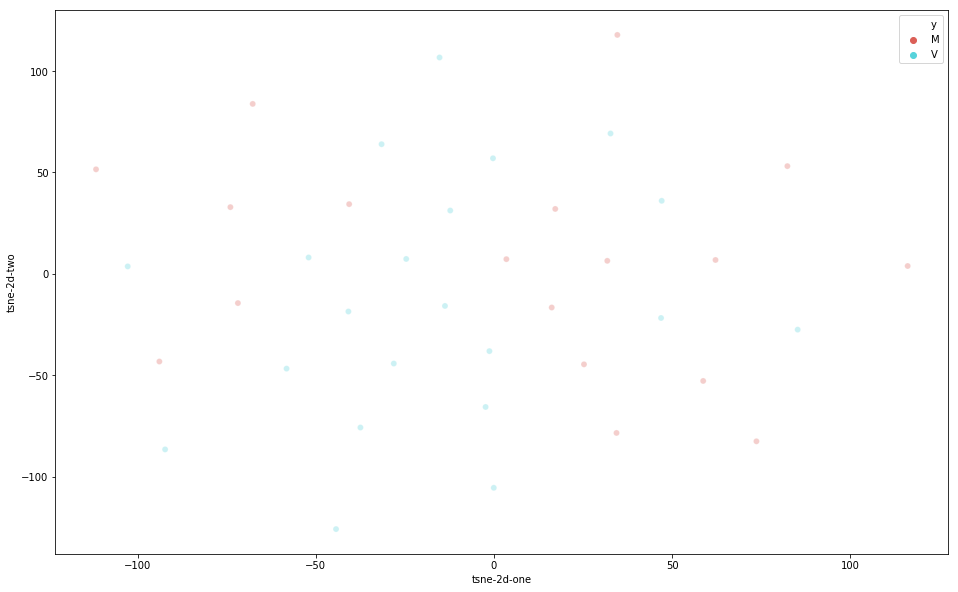

In [6]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

In [7]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 37
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values


In [8]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print(tsne_results[1:10])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.911144
[t-SNE] KL divergence after 300 iterations: 0.686328
[[  21.402735 -109.07864 ]
 [  78.26653    79.43381 ]
 [  38.639988   59.63186 ]
 [  17.12466   -20.548866]
 [  16.719893  -63.54246 ]
 [  81.52996   -31.383617]
 [ 124.706566  -30.55682 ]
 [-176.0309    198.29929 ]
 [ -58.894722  -92.610886]]
t-SNE done! Time elapsed: 0.06179308891296387 seconds


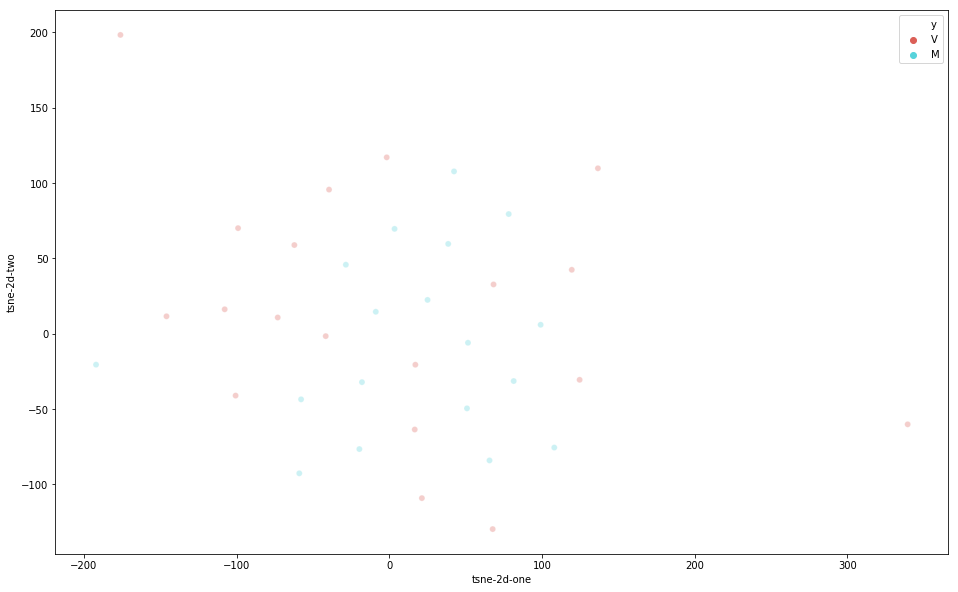

In [9]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)